
# Business Cases with Data Science 

## Case 1: Customer Segmentation

#### Semester: Spring 2020
#### Group (Palm & Company) Member:
1. Ana Claudia Alferes (M20190932)
2. Pedro Santos (M20190420)
3. Michael Machatschek (M20190054)
4. Lennart Dangers (M20190251)

#### This project follows the CRISP-DM Process:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modelling
5. Evaluation
6. Deployment

# Step 1: Business Understanding

# Step 2: Data Understanding

## Dataset Description

 Description of each variable 
 
 - var 1 ...
 
 
 
 #### The following code will help to explore and understand the entire dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
path = "https://raw.githubusercontent.com/lennartda/business_cases_C1/master/Data/Dataset.csv"
df = pd.read_csv(path, sep=";")

In [3]:
#Set ID as an Index: Check if ID only contains unique values
#df.shape: (111733, 29)
#df["ID"].nunique(): 111733
df = df.set_index('ID')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
Nationality             111733 non-null object
Age                     107561 non-null float64
DaysSinceCreation       111733 non-null int64
NameHash                111733 non-null object
DocIDHash               110732 non-null object
AverageLeadTime         111733 non-null int64
LodgingRevenue          111733 non-null float64
OtherRevenue            111733 non-null float64
BookingsCanceled        111733 non-null int64
BookingsNoShowed        111733 non-null int64
BookingsCheckedIn       111733 non-null int64
PersonsNights           111733 non-null int64
RoomNights              111733 non-null int64
DistributionChannel     111733 non-null object
MarketSegment           111733 non-null object
SRHighFloor             111733 non-null int64
SRLowFloor              111733 non-null int64
SRAccessibleRoom        111733 non-null int64
SRMediumFloor           111733 non-null int64
SRBa

In [5]:
summary=df.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nationality,111733,199,FRA,16516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,107561,NaN,NaN,NaN,45.6392,17.245,-10,33,47,58,123
DaysSinceCreation,111733,NaN,NaN,NaN,595.027,374.657,36,288,522,889,1385
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageLeadTime,111733,NaN,NaN,NaN,60.8331,85.1153,-1,0,21,95,588
LodgingRevenue,111733,NaN,NaN,NaN,283.851,379.132,0,0,208,393.3,21781
OtherRevenue,111733,NaN,NaN,NaN,64.6828,123.581,0,0,31,84,8859.25
BookingsCanceled,111733,NaN,NaN,NaN,0.00228223,0.0806315,0,0,0,0,15
BookingsNoShowed,111733,NaN,NaN,NaN,0.000599644,0.0282168,0,0,0,0,3


In [6]:
df.isnull().sum()

Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [7]:
# Check counts of categorical variables (excluding nationality)
cols = ['MarketSegment']
df[cols].apply(pd.Series.value_counts)

,MarketSegment
Other,63680
Direct,16363
Travel Agent/Operator,16353
Groups,11461
Corporate,2931
Complementary,657
Aviation,288


In [8]:
cols = ['DistributionChannel']
df[cols].apply(pd.Series.value_counts)

,DistributionChannel
Travel Agent/Operator,91019
Direct,16883
Corporate,3135
GDS Systems,696


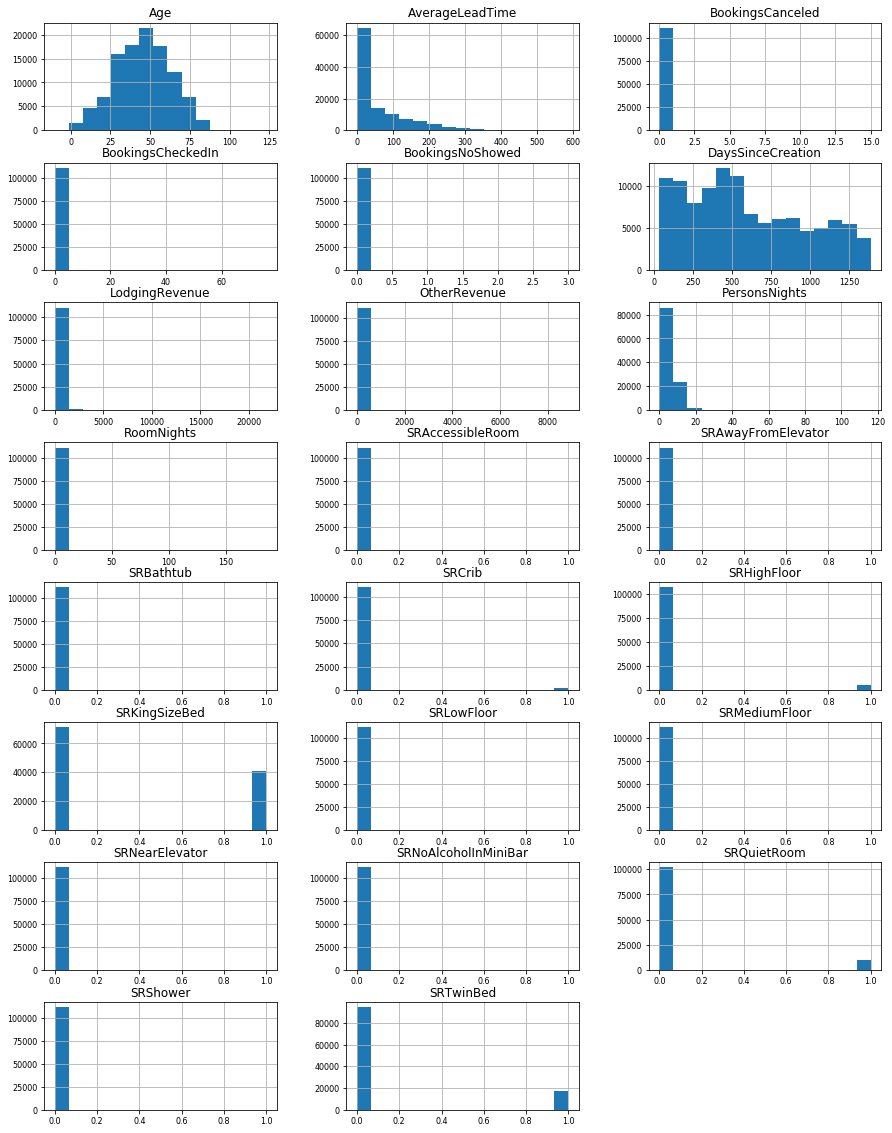

In [9]:
# Do histograms on all numeric variables
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(15, 20), layout=(8, 3), xlabelsize=8, ylabelsize=8);

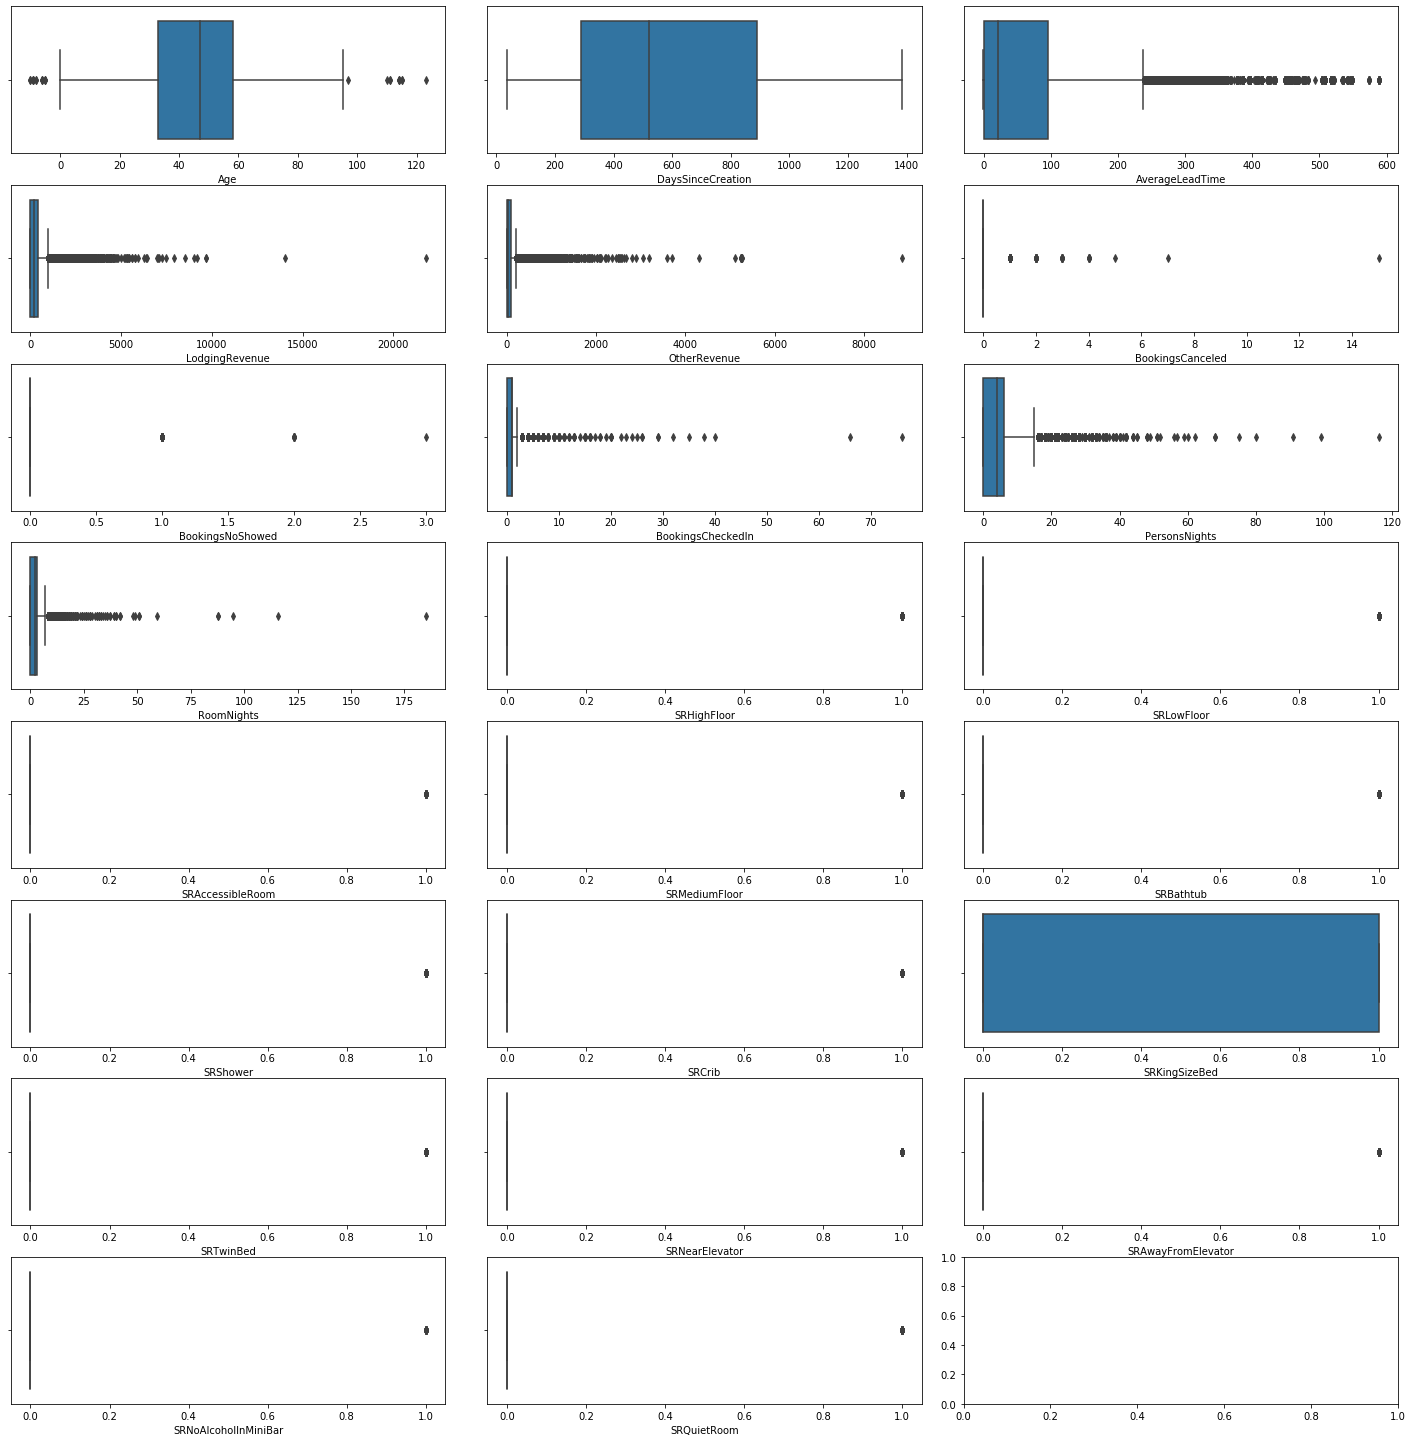

In [10]:
#boxplots to detect outliers
fig, ax = plt.subplots(8, 3, figsize=(20, 20))
fig.tight_layout()
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

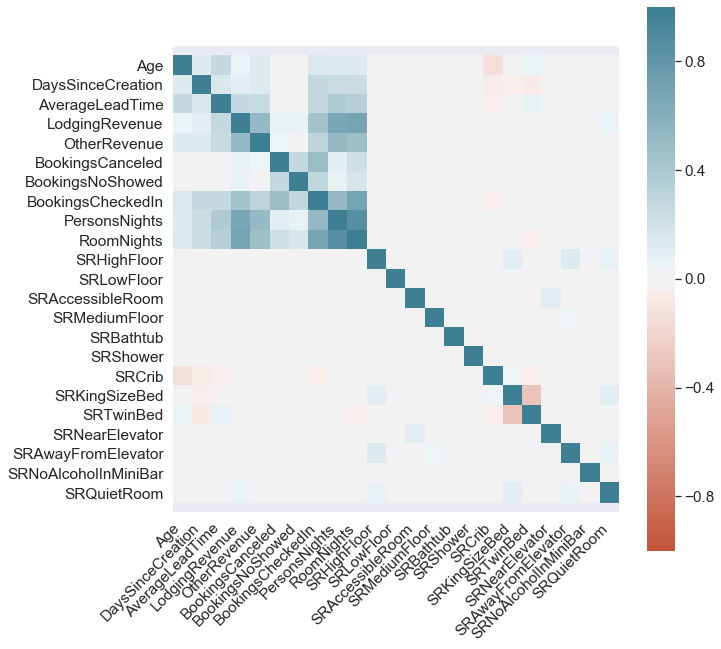

In [11]:
corr = df[numerical].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=False, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
# Doc ID NaNs 
df[(df.BookingsCheckedIn != 0) & (df.DocIDHash !=df.DocIDHash)].T #Attended bookings

df[(df.BookingsCheckedIn == 0) & (df.DocIDHash !=df.DocIDHash)].T #Never been and no doc

df[(df.BookingsCheckedIn == 0) & (df.BookingsCanceled == 0)& (df.BookingsNoShowed == 0)] #Never been

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,IRL,28.0,1385,0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...,0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,FRA,57.0,1385,0x4DCD77E3D2E2CC9E22007657A9FD76DC517A32B6AFED...,0x670102CA121D0317A5AA2047ED6D63535A1E7177DEC5...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,ESP,58.0,1385,0x687F687634AB73BF29FF942F4E32781663FE00ACAD25...,0x24BE7F0DC5BB617D19234A7C338B9723F55833265C31...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,FRA,72.0,1385,0xA72500CAF0F282A35AA333F7F3D09CE0157F6AEAB525...,0x0FA6748AEF42771528A93C08BE13EF84F704E7C8F5D1...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,FRA,27.0,1385,0x60D60695D7E3650D5C35B0DF105F85134450F8456C4D...,0x465FA5F32DE6BF5C84493F791F3DC03DBB7CCA541FB1...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Step 3: Data Preparation

In [13]:
X = df.copy(deep= True)

In [14]:
# Remove columns that should not be used as they do not represent customer's characteristics or behavior
cols = ['MarketSegment']
X.drop(columns=cols, inplace=True)

In [15]:
# Drop customers with zero revenue but positive checkins, because we assume these are mostly bookings from staff
X = X[~((X.LodgingRevenue == 0)&(X.BookingsCheckedIn >=1))] 

# Drop customers with zero cancellend, no show and checked in bookings, because we assume that these are from older systems
X = X[~((X.BookingsCanceled == 0)&(X.BookingsNoShowed == 0)&(X.BookingsCheckedIn ==0))] 

In [16]:
X["IDMerge"] = X.DocIDHash + " + " +X.NameHash + " + "+X.Nationality

In [17]:
#Merge remaining duplicated rows with same DocIdHash
def modef(x):
    return x.mode()[0]

aggregation_functions = {'Nationality': modef, 'Age': 'mean', 'DaysSinceCreation': 'first','NameHash': 'first','AverageLeadTime': 'mean'
                        ,'LodgingRevenue': 'sum','OtherRevenue': 'sum','BookingsCanceled': 'sum','BookingsNoShowed': 'sum','BookingsCheckedIn': 'sum','PersonsNights': 'sum','RoomNights': 'sum'
                        ,'DistributionChannel': modef,'SRHighFloor': "last",'SRLowFloor':"last",'SRAccessibleRoom': "last",'SRMediumFloor':"last",
                        'SRBathtub': "last",'SRShower': "last",'SRCrib': "last",'SRKingSizeBed': "last",
                        'SRTwinBed': "last",'SRNearElevator': "last",'SRAwayFromElevator': "last",'SRNoAlcoholInMiniBar': "last",
                        'SRQuietRoom': "last"}

X_new = X.groupby(X['IDMerge']).aggregate(aggregation_functions)
X_new = X_new.reset_index()

In [54]:
# Outlier handling 
# Treat negative AverageLeadTime as real time booking; averageleadtime = 0
#X_new[X_new.AverageLeadTime>360]

# Everything looks fine
#X_new[X_new.LodgingRevenue > 10000]

#Create a new feature to check for outliers
X_new["PricePerNight"] = X_new.LodgingRevenue / X_new.RoomNights
# Everything looks fine

#X_new[X_new.PricePerNight > 1500]

# Everything looks fine
#X_new[X_new.OtherRevenue > 4000]

#Create a new feature to check for outliers
X_new["OtherRevenuePerPersonNight"] = X_new.OtherRevenue / X_new.PersonsNights

# Everything looks fine apart from inf
#X_new[X_new["OtherRevenuePerPersonNight"]>1000]

# Only 1 case where looks like staff (2.2€per night). Define a min price per night and drop customers below.
#X_new[X_new.BookingsCanceled > 14]

#Most clients have decent price per night/other revenue (most are corporate) and theres the staff guy from above.
#X_new[X_new.BookingsCheckedIn > 30]

#Most clients have decent price per night/other revenue (also they are corporate) and theres the staff guy from above.
#X_new[X_new.PersonsNights > 80]

#Most clients have decent price per night/other revenue (also they are corporate) and theres the staff guy from above.
#X_new[X_new.RoomNights > 75]





,2340,12576,14605,16234,31024,46776,46780,60077,68576,73164
IDMerge,0x08007328E88BA93B551B9F9F056AAFE2C00E94CCEE69...,0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...,0x32486B5C95409439A72B10899814F8A34F4E4FACD16E...,0x3856085146F7BC27BD07BFC4CA1991ED4E65E179D7BD...,0x6C6CBE81716B51F09ECE9AD8CBB82E1AB5175CEFBC5B...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,0xA486FBACF4B4E5537B026743E3FDFE571D716839E758...,0xD2DBD6039916F6DB10C6564D8EB9A9116811435965D7...,0xE743A82AF701A15DC8CF79597004179B4855E4A8C5BC...,0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...
Nationality,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT,PRT
Age,45,48,52,49,59,51,51,49,59,NaN
DaysSinceCreation,1288,1323,589,1170,1169,693,1147,1170,663,1315
NameHash,0x84DF93E126886E0003E45A8B0A1127EDDDA6A3BEC276...,0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...,0xB91FA1D22063F7693FEFD098466A17770C32136F4CB1...,0xCC6A9BE603D312DEFDFD886218FB1FE35EC93C47F6C7...,0x5208B365ECB706685A00A16D131AEAEC63208B3B5BC4...,0x8DF2AF984365949E7F4EAB2EBA9BF9CA8DF106B5F2A9...,0xD345B7964D8B1D2438F4F54BC14AEC9C5261AC3C2CB6...,0x6C5F83CA37178B8711D808B3132F2CAF87D35A8C1D4E...,0x09413F402F7CEF780E3205F91B20F2C9CF82B3418A29...,0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...
AverageLeadTime,75,34.0667,21.6,19.8,3,16.3,21,16,17.1429,34
LodgingRevenue,138,11740.6,5584.07,7232.5,195.75,12819.9,6991,6856.96,5582,21981
OtherRevenue,38.5,3066.5,786.93,1097,87,2025.2,957,924.04,943.5,1616
BookingsCanceled,0,5,7,11,15,6,0,6,13,1
BookingsNoShowed,0,1,1,3,0,4,2,4,3,0


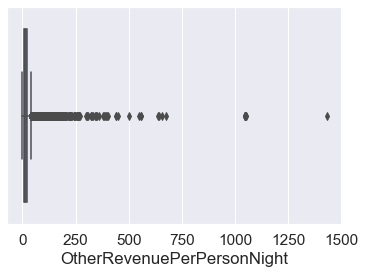

In [36]:
sns.boxplot(X_new["OtherRevenuePerPersonNight"])

In [55]:
#X_new[(X_new.RoomNights>1) & (X_new.PersonsNights==0)].T
#Check why this happens w/ teacher

In [68]:
#Filling NaNs in Age
X_new[X_new.Age >100 ]
#Drop Nans, negatives and values above 100 and then try to recluster them 
dropped_age = X_new[(X_new.Age >100)|(X_new.Age <0)|(X_new.Age != X_new.Age)]
X_new = X_new[~((X_new.Age >100)|(X_new.Age <0)|(X_new.Age != X_new.Age))]


In [70]:
#Feature Engineering 
#Already created the price per room + other revenue per person per night 
X_new["PersonPerRoom"] = X_new.PersonsNights / X_new.RoomNights


count    72921.000000
mean         1.949627
std          0.664009
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: PersonPerRoom, dtype: float64

(72922, 2)


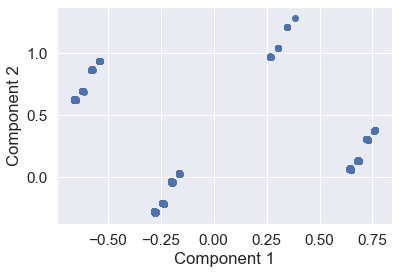

In [80]:
# Let'start to visualize with only two components
SR = X_new.columns.values[14:-3]
pca2 = PCA(n_components = 2)
pca2.fit(X_new[SR])
X_pca2 = pca2.transform(X_new[SR]) # Apply the dimension reduction to the dataset
print(X_pca2.shape)

# Plot a scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [84]:
# Fit the PCA algorithm to data 
pca = PCA().fit(X_new[SR])

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X_new[SR].columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF
#2 PCAs explain most of the variance so it is a fair assumption that we can use 'em.

,Component,Variance explained,Cumulative variance explained
0,1,0.504963,0.504963
1,2,0.216384,0.721347
2,3,0.156373,0.877719
3,4,0.079095,0.956814
4,5,0.021026,0.977840
5,6,0.007330,0.985169
6,7,0.005925,0.991094
7,8,0.003397,0.994491
8,9,0.002523,0.997014
9,10,0.001479,0.998493
